In [19]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

import pandas as pd 
hpi_df = pd.read_csv("hpi_master.csv")
hpi_df.head(10)

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,100.92,100.98
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.31,100.93
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.70,101.00
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.32,101.37
5,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,6,102.79,101.51
6,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,7,102.98,101.88
7,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,8,103.15,102.04
8,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,9,102.83,102.00
9,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,10,103.08,102.33


In [20]:
#get the unique values
hpi_df.nunique()

hpi_type          4
hpi_flavor        3
frequency         2
level             4
place_name      466
place_id        466
yr               48
period           12
index_nsa     30575
index_sa      19044
dtype: int64

In [21]:
#value counts for binning index_nsa
nsa_df = hpi_df.index_nsa.value_counts()
nsa_df

100.00    809
103.73     22
103.28     22
101.57     22
101.63     22
         ... 
320.86      1
335.73      1
353.61      1
360.42      1
196.89      1
Name: index_nsa, Length: 30575, dtype: int64

<AxesSubplot:ylabel='Density'>

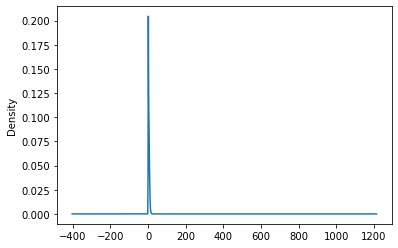

In [22]:
#visualize index_nsa
nsa_df.plot.density()

In [23]:
# Determine which values to replace if counts are less than ...?
replace_nsa = list(nsa_df[nsa_df == 100].index)

# Replace in dataframe
for nsa in replace_nsa:
        nsa_df.index_nsa = hpi_df.index_nsa.replace(nsa,"100")
    
# Check to make sure binning was successful
hpi_df.index_nsa.value_counts()

100.00    809
103.73     22
103.28     22
101.57     22
101.63     22
         ... 
320.86      1
335.73      1
353.61      1
360.42      1
196.89      1
Name: index_nsa, Length: 30575, dtype: int64

In [24]:
#value counts for binning index_sa
sa_df = hpi_df.index_sa.value_counts()
sa_df

100.00    301
101.11     14
104.14     12
100.10     12
99.76      11
         ... 
344.62      1
356.85      1
409.66      1
427.74      1
155.27      1
Name: index_sa, Length: 19044, dtype: int64

<AxesSubplot:ylabel='Density'>

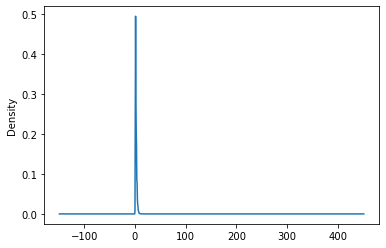

In [25]:
#visualize the density plot
sa_df.plot.density()

In [26]:
#value counts for binning place_name
place_name_df = hpi_df.place_name.value_counts()
place_name_df.head(50)

East North Central Division                        810
South Atlantic Division                            810
East South Central Division                        810
United States                                      810
West North Central Division                        810
West South Central Division                        810
Pacific Division                                   810
New England Division                               810
Mountain Division                                  810
Middle Atlantic Division                           810
Los Angeles-Long Beach-Glendale, CA (MSAD)         560
Oakland-Berkeley-Livermore, CA (MSAD)              559
Anaheim-Santa Ana-Irvine, CA (MSAD)                559
San Francisco-San Mateo-Redwood City, CA (MSAD)    558
Chicago-Naperville-Evanston, IL (MSAD)             558
Warren-Troy-Farmington Hills, MI (MSAD)            558
Atlanta-Sandy Springs-Alpharetta, GA               557
San Diego-Chula Vista-Carlsbad, CA                 557
Miami-Miam

<AxesSubplot:ylabel='Density'>

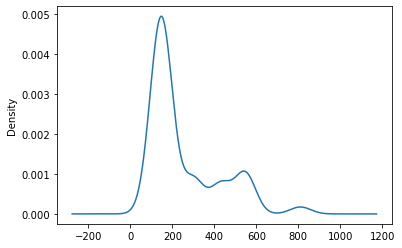

In [27]:
place_name_df.plot.density()

In [28]:
#value counts for binning place_id
place_id_df = hpi_df.place_id.value_counts()
place_id_df.head(30)

DV_ENC    810
DV_SA     810
DV_ESC    810
USA       810
DV_WNC    810
DV_WSC    810
DV_PAC    810
DV_NE     810
DV_MT     810
DV_MA     810
31084     560
36084     559
11244     559
41884     558
16984     558
47664     558
12060     557
41740     557
33124     557
45300     555
40140     555
38060     551
ID        544
MN        544
MI        544
ME        544
MD        544
MA        544
LA        544
KY        544
Name: place_id, dtype: int64

<AxesSubplot:ylabel='Density'>

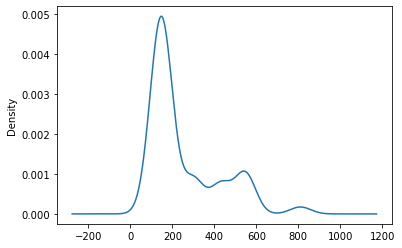

In [29]:
#visualize place_id
place_id_df.plot.density()

In [ ]:
replace_ask_amt = list(ask_amt[ask_amt < 1000].index)

# Replace in dataframe
for amt in replace_ask_amt:
    if amt <= 49999:
        app_df.ASK_AMT = app_df.ASK_AMT.replace(amt,str("5001-49999"))
    elif amt < 99999:
        app_df.ASK_AMT = app_df.ASK_AMT.replace(amt,str("50000-99999"))
    elif amt < 499999:
        app_df.ASK_AMT = app_df.ASK_AMT.replace(amt,str("100000-499999"))
    elif amt < 999999:
        app_df.ASK_AMT = app_df.ASK_AMT.replace(amt,str("500000-999999"))
    elif amt < 4999999:
        app_df.ASK_AMT = app_df.ASK_AMT.replace(amt,str("1M-5M"))
    else:
        app_df.ASK_AMT = app_df.ASK_AMT.replace(amt,str("5M+"))
        
        
        if amt == 100.00:
            nsa_df.index_nsa = app_df.index_nsa.replace(nsa,str("100"))
        elif amt <=
            nsa_df.index_nsa = app_df.index_nsa.replace(nsa,str("Other"))

SyntaxError: invalid syntax (Temp/ipykernel_12792/3625017706.py, line 21)

In [ ]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(hpi_df[app_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(app_cat)
encode_df.head()

In [ ]:
# Merge one-hot encoded features and drop the originals
app_df = app_df.merge(encode_df,left_index=True, right_index=True)
app_df = app_df.drop(app_cat,1)
app_df.head()

In [ ]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#### After preprocessing data, design a neural network with modifications to get more than 75% accuracy

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 40

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

In [ ]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[cp_callback])